In [39]:
import re
file_name ='infer_log_server_10rps_ train_None+infer_deeplabv3_resnet50_20230301.csv'
a = re.findall(r'.*(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)
a
# print(prefix, model_name, suffix)

[('infer_log', 'deeplabv3_resnet50', '.csv')]

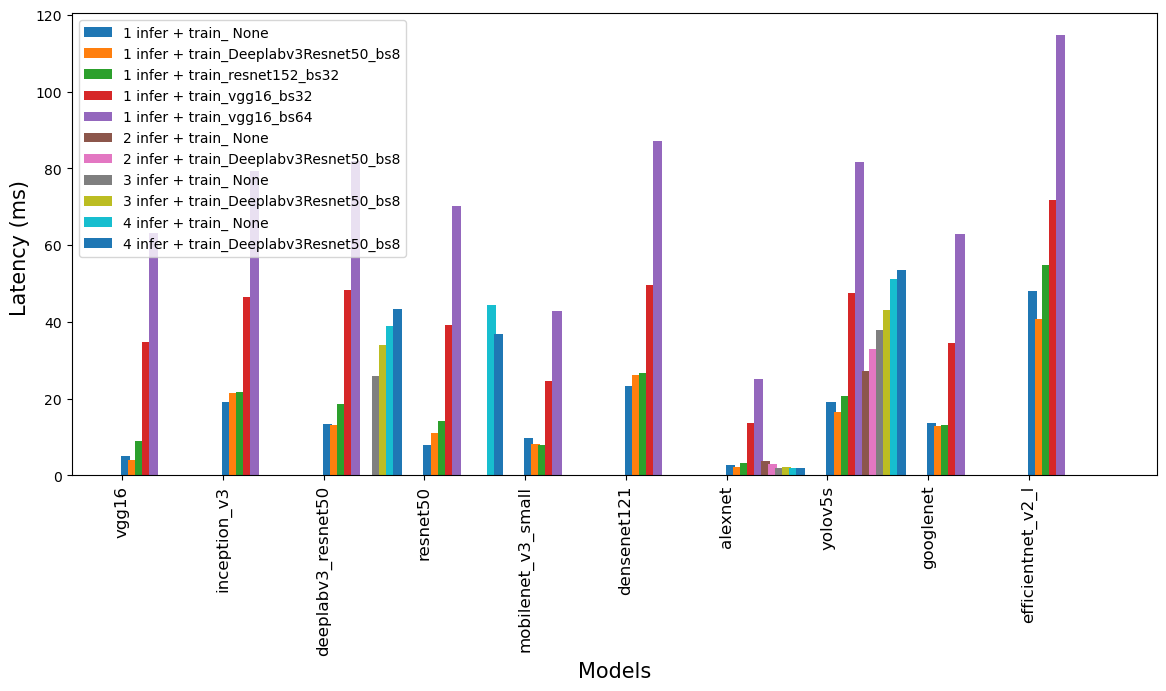

In [107]:
## bar plot by percentile_new 10rps
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

root = '/home/royliu/Documents/profile_train_infer/result/data/server_result_10rps'

fill_colors=['orange', 'green', 'red', 'purple','brown', 'pink', 'gray', 'olive', 'cyan', 'gold','lawngreen', 'violet']
fig, ax = plt.subplots(1,1, figsize=(14,6))
mode_list = []
bp_box_list =[]
res_list =[]
value_type = 'mean'
p =0.95

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        try:  # filter those file no need plot
#             print(file_name)
            prefix, model_name, suffix = re.findall(r'.*(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        except:
            continue
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)[100:] #filter first 100 data of initialization
    return data

def percentile(data, p, col):
    lt = data[col]
    lt = sorted(lt)
    res =lt[int(p*len(lt))]
    return res

def plot_bar(data, cols, p):
    res_list = []
    col=cols
    for model in col:
        y = data[model].to_list()
        res = percentile(data, p, model)
        res_list.append(res)

    x_axis= np.arange(len(col))  
    plt.bar(x_axis+(i+0.5)*.07, res_list, width =0.09, label=mode) 
    mode_list.append(mode)

## main
sub_folder_list = sorted(os.listdir(root), reverse=False)  #experiment mode
for i, mode in enumerate(sub_folder_list):
    medians, means = [], []
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    plot_bar(data, cols, p)

x_axis= np.arange(len(cols))  
plt.xticks(x_axis, cols, fontsize= 12, rotation = 90)
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) ', fontsize= 15) 
plt.legend(mode_list, loc=2)

plt.savefig('../result/plot/inference_latency_summary.png',dpi=600, bbox_inches='tight')
plt.show()

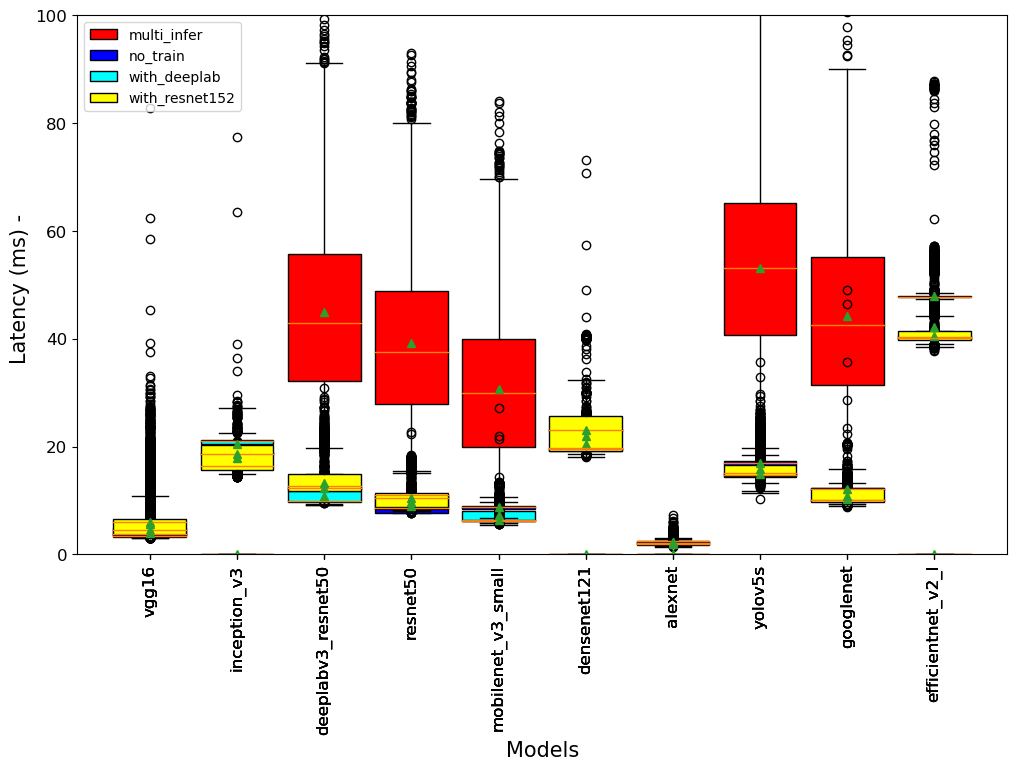

In [21]:
# of old 10 rps
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):   
        try:  # filter those file no need plot
            prefix, model_name, suffix = re.findall(r'.*(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        except: # bypass those no useful file
            continue

        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

def plot_box(data,mode,fill_color):
    col=cols
    plot_interval =0.5
    for i in range(len(col)):
        y= data[col[i]]
        bp = ax.boxplot(y, widths= plot_interval, positions = [i*(plot_interval+0.1)],\
                        labels = [col[i]],showmeans=True, patch_artist=True,)
        for patch in bp['boxes']:  ## props: ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']
            patch.set(facecolor=fill_color)   
    plt.xticks(fontsize= 12, rotation = 90)  #set label size
    plt.yticks(fontsize= 12)  #set label size
# #     median, mean = np.median(y), np.mean(y)
# #     plt.text(i*(plot_interval+0.1)+0.05,median*1, '%0.1f'%median, color= 'brown')#     
    plt.ylim(0, 100)
    return bp["boxes"][0] # return box for ploting

## main
root = '/home/royliu/Documents/profile_train_infer/result/data/old_10rps'
fill_colors=['red','blue','cyan','yellow', 'green','brown', 'olive','gold', 'teal', 'violet','pink']
fig, ax = plt.subplots(1,1, figsize=(12,7))
mode_list = []
bp_box_list =[]
for i, mode in enumerate(os.listdir(root)):
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    bx= plot_box(data, mode,fill_color)
    bp_box_list.append(bx)
    mode_list.append(mode)
    
plt.legend(bp_box_list,mode_list, loc = 'best')
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) - ', fontsize= 15) 
plt.show()



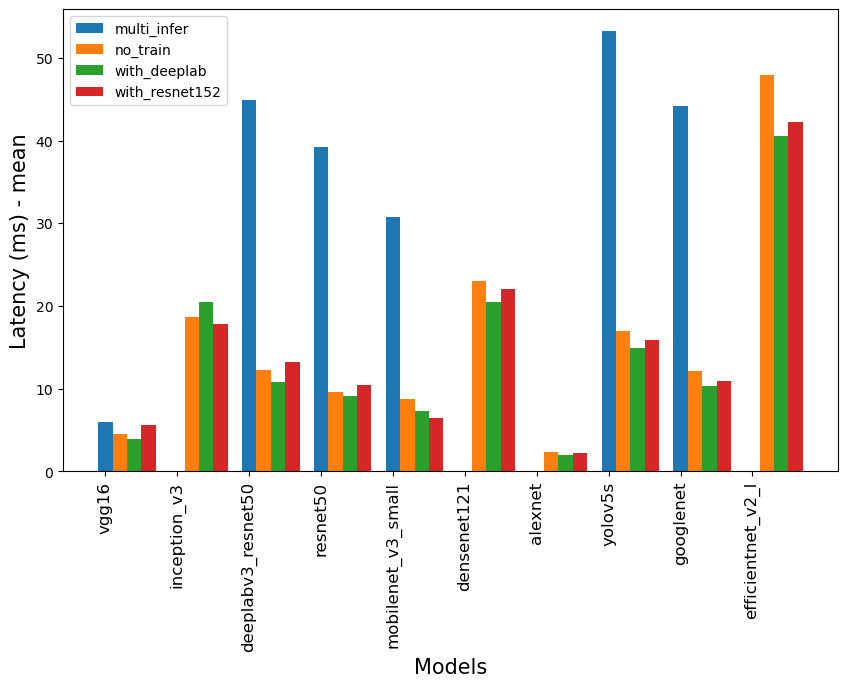

In [23]:
## bar plot, by value of mean or median, # of old 10 rps
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        try:  # filter those file no need plot
            prefix, model_name, suffix = re.findall(r'.*(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        except:
            continue
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

root = '/home/royliu/Documents/profile_train_infer/result/data/old_10rps'
fill_colors=['red','blue','cyan','yellow', 'green','brown', 'olive','gold', 'teal', 'violet','pink']
fig, ax = plt.subplots(1,1, figsize=(10,6))
mode_list = []
bp_box_list =[]
value_type = 'mean'

def plot_bar(data, cols, value_type='median'):
    col=cols
    for model in col:
        y = data[model].to_list()
        median, mean = np.median(y), np.mean(y)
        medians.append(median)
        means.append(mean)
    values = medians if value_type == 'median' else means
    x_axis= np.arange(len(col))  
    plt.bar(x_axis+i*.2, values, width =0.2, label=mode) 
    mode_list.append(mode)

## main
for i, mode in enumerate(os.listdir(root)):
    medians, means = [], []
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    plot_bar(data, cols, value_type)

x_axis= np.arange(len(cols))  
plt.xticks(x_axis, cols, fontsize= 12, rotation = 90)
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) - '+value_type, fontsize= 15) 
plt.legend(mode_list, loc=2)
plt.show()

In [81]:
import asyncio
import time
 
 
async def hello1(a,b):
    print("Hello world 01 begin")
    await asyncio.sleep(3)  #模拟耗时任务3秒
    print("Hello again 01 end")
    return a+b
 
coroutine=hello1(10,5)
loop = asyncio.get_event_loop()                #第一步：创建事件循环
task=asyncio.ensure_future(coroutine)         #第二步:将多个协程函数包装成任务列表
loop.run_until_complete(task)                  #第三步：通过事件循环运行
print('-------------------------------------')
print(task.result())
loop.close() 
 
'''运行结果为
Hello world 01 begin
Hello again 01 end
-------------------------------------
15
'''

/home/royliu/anaconda3/envs/tf/lib/python3.9/ast.py:50: RuntimeWarning: coroutine 'main' was never awaited
  return compile(source, filename, mode, flags,


RuntimeError: This event loop is already running

Hello world 01 begin
Hello again 01 end
